In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv(r'C:\Users\HP\Documents\Sales Data Analysis\Sales_Data\cleanedMergedSales2019_df.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1.0,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12
185946,319667,AA Batteries (4-pack),2.0,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
185947,319668,Vareebadd Phone,1.0,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12
185948,319669,Wired Headphones,1.0,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 9.9+ MB


### Summary
The DataFrame contains 185,950 entries with 7 columns. The columns include both numerical data (integers and floats) and string data (objects). All columns have non-null entries, meaning there are no missing values in this dataset

In [4]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Month
count,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140
std,51512.737110,0.442793,332.731330,3.502996
min,141234.000000,1.000000,2.990000,1.000000
25%,185831.250000,1.000000,11.950000,4.000000
50%,230367.500000,1.000000,14.950000,7.000000
75%,275035.750000,1.000000,150.000000,10.000000
max,319670.000000,9.000000,1700.000000,12.000000


### Interpretation of the Summary Statistics
#### General

   Order ID, Quantity Ordered, Price Each, and Month: These are the columns being described.
   The statistics provided include count, mean, standard deviation (std), minimum (min), and maximum (max) values, as well as the 25th, 50th (median), and 75th percentiles.

#### Detailed Breakdown

  ##### Order ID:
        count: 185950 (Total number of orders)
        mean: 230417.57 (Average order ID number)
        std: 51512.74 (Standard deviation of order IDs, indicating variability in order ID numbers)
        min: 141234 (Smallest order ID)
        25%: 185831.25 (Order ID at the 25th percentile)
        50%: 230367.50 (Median order ID)
        75%: 275035.75 (Order ID at the 75th percentile)
        max: 319670 (Largest order ID)

  ##### Quantity Ordered:
        count: 185950 (Total number of orders with quantities)
        mean: 1.12 (Average quantity ordered)
        std: 0.44 (Standard deviation of quantities ordered)
        min: 1 (Smallest quantity ordered)
        25%: 1 (Quantity ordered at the 25th percentile)
        50%: 1 (Median quantity ordered)
        75%: 1 (Quantity ordered at the 75th percentile)
        max: 9 (Largest quantity ordered)

  ##### Price Each:
        count: 185950 (Total number of price entries)
        mean: 184.40 (Average price per unit)
        std: 332.73 (Standard deviation of prices, indicating a high variability in prices)
        min: 2.99 (Lowest price per unit)
        25%: 11.95 (Price at the 25th percentile)
        50%: 14.95 (Median price per unit)
        75%: 150.00 (Price at the 75th percentile)
        max: 1700.00 (Highest price per unit)

  ##### Month:
        count: 185950 (Total number of month entries)
        mean: 7.06 (Average month value, suggesting the data spans the entire year)
        std: 3.50 (Standard deviation of month values)
        min: 1 (Earliest month, January)
        25%: 4 (Month at the 25th percentile, April)
        50%: 7 (Median month, July)
        75%: 10 (Month at the 75th percentile, October)
        max: 12 (Latest month, December)

#### Summary

   Order ID: The IDs are spread out over a range with the median around 230,368, indicating no particular skew.
   Quantity Ordered: Most orders are for a single item, with rare orders of up to 9 items.
   Price Each: Prices vary widely, with a significant number of low-cost items and some high-cost items, as indicated by the high standard deviation.
   Month: Orders are distributed throughout the year, with data spanning from January to December.

In [5]:
# Convert "Order Date" Column:
# Use the pd.to_datetime() function to convert the "Order Date" column to a datetime datatype.
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 9.9+ MB


In [7]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [8]:
# Add city column
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX)


In [9]:
# Add hour and minute columns
# all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
# all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
# all_data['Count'] = 1
# all_data.head()

In [10]:
# Create "hour" and "minute" columns
df['hour'] = df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,hour,minute
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),21,25
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14,15
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),20,33
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11,59


In [11]:
# Create "Sales" column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,hour,minute,Sales
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),21,25,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14,15,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),13,33,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),20,33,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11,59,11.99


## What was the best month for sales, and how much was earned that month?

In [12]:
# Group by month and sum the sales
monthly_sales = df.groupby('Month').sum()['Sales']
monthly_sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [13]:
# Find the best month for sales
best_month_num = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()

# Map month numbers to names
month_names = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
best_month_name = month_names[best_month_num]

print(f"The best month for sales was {best_month_name} with total sales of ${best_month_sales:.2f}.")

The best month for sales was December with total sales of $4613443.34.


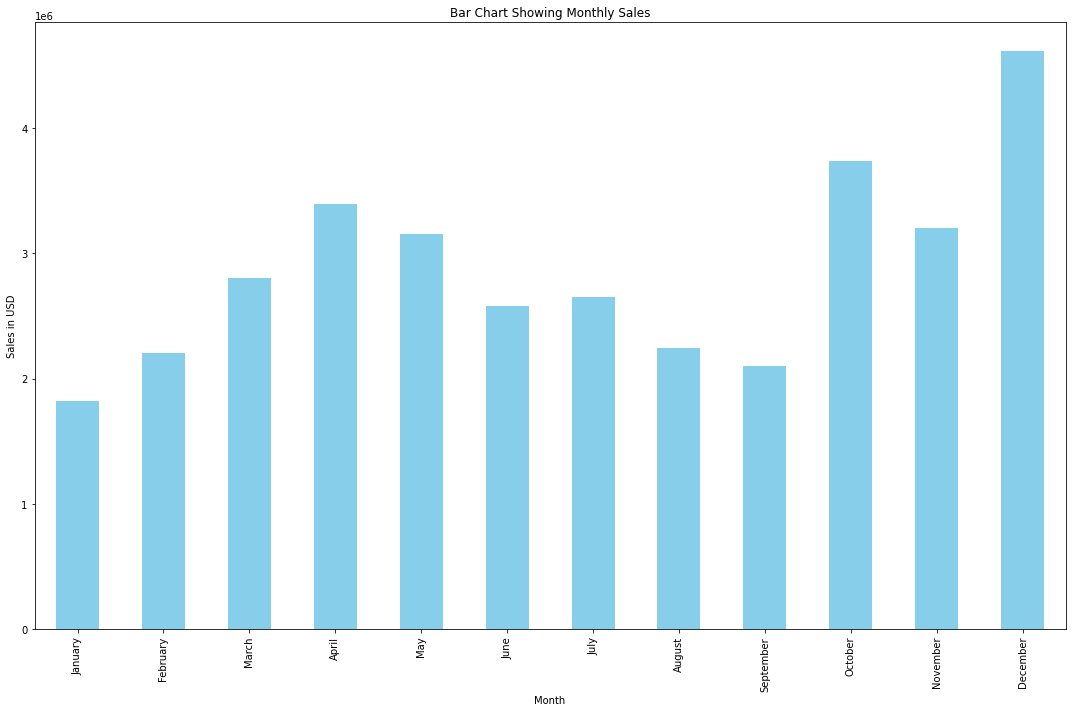

In [14]:
monthly_sales.index = monthly_sales.index.map(month_names)

# Plotting the bar chart
plt.figure(figsize=(15, 10))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Bar Chart Showing Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## What City sold the most Product

In [15]:
# Group by city and sum the quantity ordered
city_sales = df.groupby('City').sum()['Quantity Ordered']

# Find the city with the highest quantity sold
best_city = city_sales.idxmax()
best_city_sales = city_sales.max()

print(f"The city with the most products sold is {best_city} with a total quantity of {best_city_sales}.")

The city with the most products sold is San Francisco  (CA) with a total quantity of 50239.0.


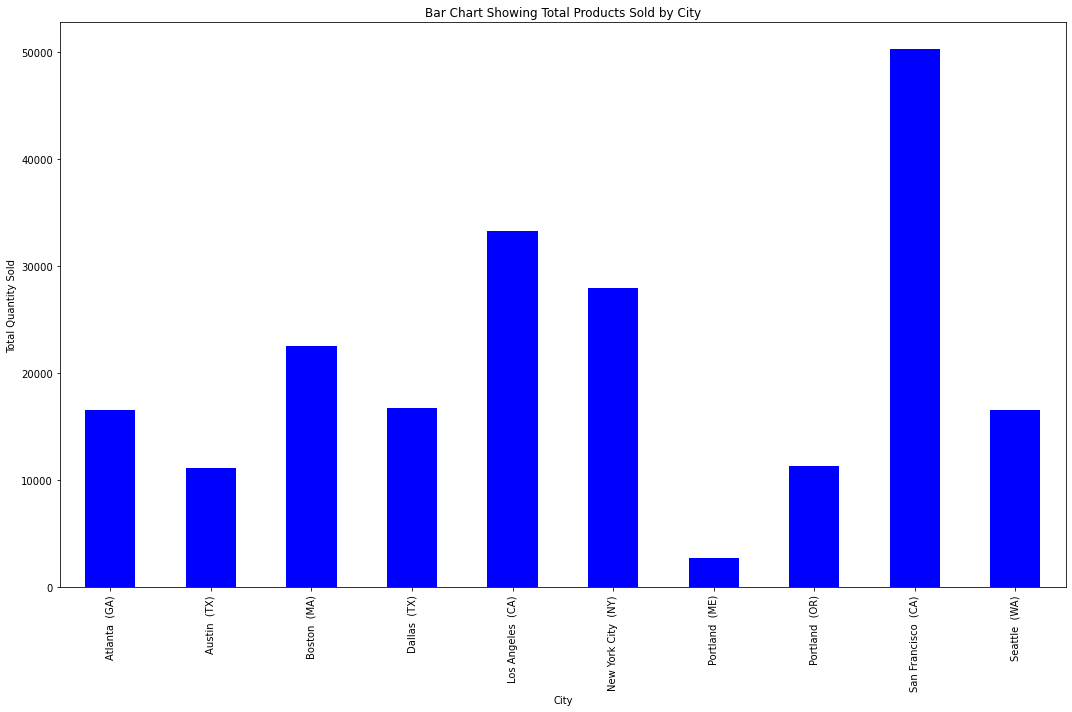

In [16]:
# Plotting the bar chart
plt.figure(figsize=(15, 10))
city_sales.plot(kind='bar', color='blue')
plt.title('Bar Chart Showing Total Products Sold by City')
plt.xlabel('City')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## What Products Combination were often sold together?

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,hour,minute,Sales
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),21,25,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14,15,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),13,33,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),20,33,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11,59,11.99


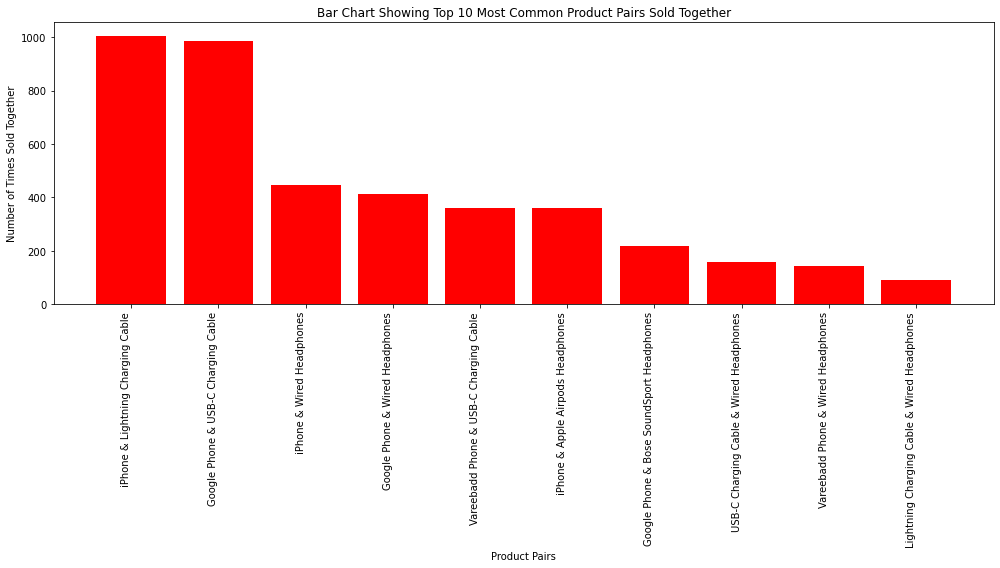

In [18]:
from itertools import combinations
from collections import Counter

# Aggregate products by Order ID
order_product = df.groupby('Order ID')['Product'].apply(list).reset_index()

# Generate all possible product pairs for each order
product_pairs = []

for order in order_product['Product']:
    product_pairs.extend(list(combinations(order, 2)))

# Count the frequency of each pair
pair_counts = Counter(product_pairs)

# Display the most common pairs
most_common_pairs = pair_counts.most_common(10)



# Extract pair names and their counts
pairs, counts = zip(*most_common_pairs)
pair_names = [' & '.join(pair) for pair in pairs]

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.bar(pair_names, counts, color='Red')
plt.xlabel('Product Pairs')
plt.ylabel('Number of Times Sold Together')
plt.title('Bar Chart Showing Top 10 Most Common Product Pairs Sold Together')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [19]:
print('Most Products sold together')
most_common_pairs

Most Products sold together


[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Which product was sold the most

In [34]:
# Group by product and sum the quantity ordered
product_sales = df.groupby('Product').sum()['Quantity Ordered']

# Find the product with the highest quantity sold
best_product = product_sales.idxmax()
best_product_sales = product_sales.max()

print(f"The product sold the most is {best_product} with a total quantity of {best_product_sales}.")

The product sold the most is AAA Batteries (4-pack) with a total quantity of 31017.0.


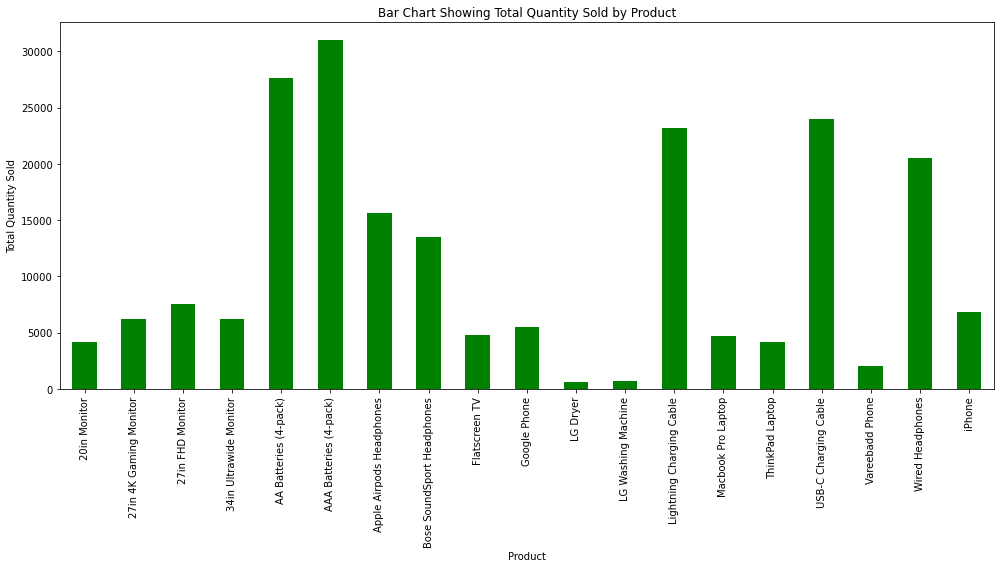

In [33]:
# Plotting the bar chart
plt.figure(figsize=(14, 8))
product_sales.plot(kind='bar', color='Green')
plt.title('Bar Chart Showing Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
print("Most products sold most")
product_sales

Most products sold most


Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

<ipython-input-22-949a7618c992>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_group.index, rotation=90, ha='right')


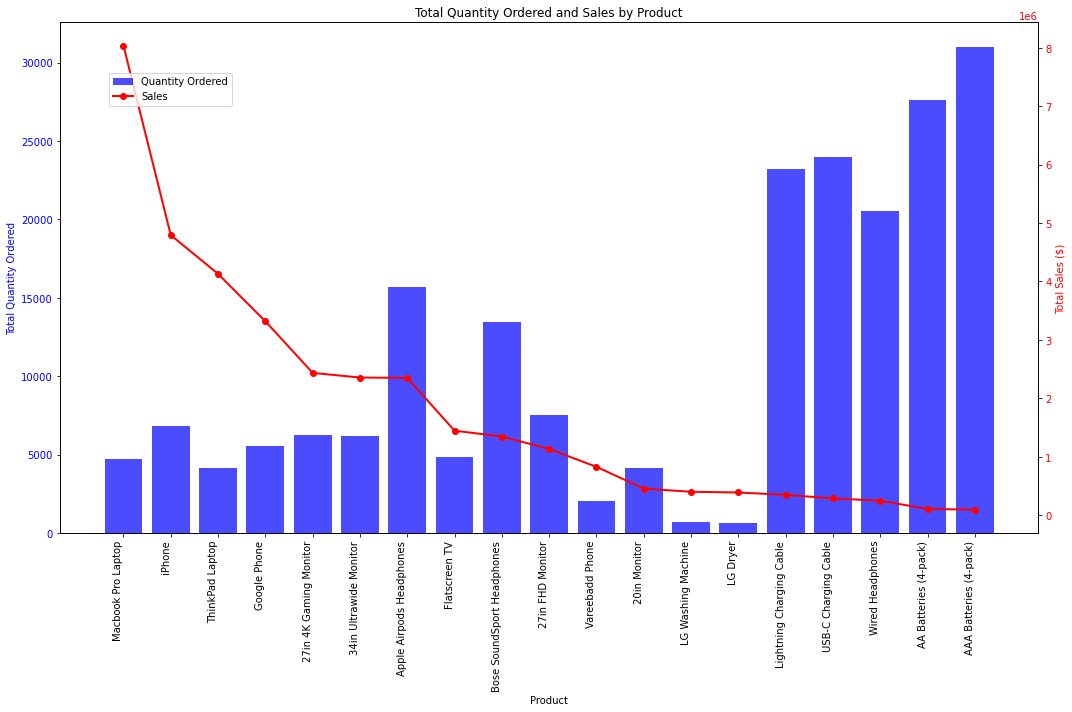

In [22]:
# Group by product and calculate the sum of quantity ordered and total sales
product_group = df.groupby('Product').sum()[['Quantity Ordered', 'Sales']]

# Sort the values for better visualization
product_group = product_group.sort_values(by='Sales', ascending=False)

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot Quantity Ordered
ax1.set_title('Total Quantity Ordered and Sales by Product')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity Ordered', color='b')
ax1.bar(product_group.index, product_group['Quantity Ordered'], color='b', alpha=0.7, label='Quantity Ordered')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(product_group.index, rotation=90, ha='right')

# Create a second y-axis for Sales
ax2 = ax1.twinx()
ax2.set_ylabel('Total Sales ($)', color='r')
ax2.plot(product_group.index, product_group['Sales'], color='r', marker='o', linestyle='-', linewidth=2, label='Sales')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.tight_layout()
plt.show()

## Sales by Time of Day

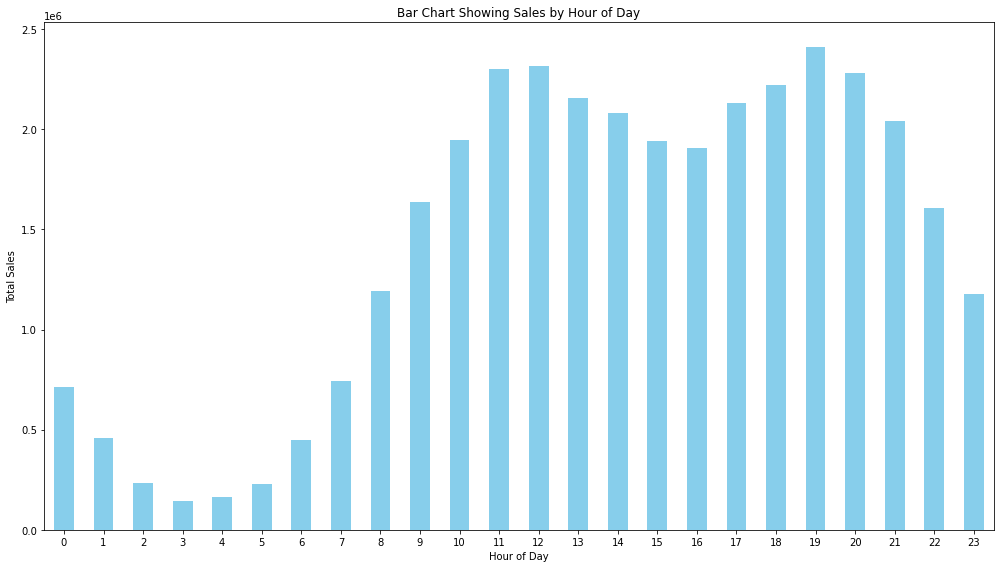

In [23]:
# Aggregate sales by hour
sales_by_hour = df.groupby('hour').sum()['Sales']

# Plotting the sales by hour
plt.figure(figsize=(14, 8))
sales_by_hour.plot(kind='bar', color='skyblue')
plt.title('Bar Chart Showing Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Top Customers

In [24]:
# # Assuming 'Customer ID' column exists
# top_customers = df.groupby('Customer ID').sum()['Sales'].sort_values(ascending=False).head(10)

# # Plotting the top customers
# plt.figure(figsize=(14, 8))
# top_customers.plot(kind='bar', color='orange')
# plt.title('Top 10 Customers by Total Sales')
# plt.xlabel('Customer ID')
# plt.ylabel('Total Sales')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()


## Sales by Region

In [25]:
# # Assuming 'Region' column exists, derived from 'Purchase Address'
# sales_by_region = df.groupby('Region').sum()['Sales']

# # Plotting sales by region
# plt.figure(figsize=(12, 6))
# sales_by_region.plot(kind='bar', color='green')
# plt.title('Sales by Region')
# plt.xlabel('Region')
# plt.ylabel('Total Sales')
# plt.xticks(rotation=90)
# plt.tight_layout()
# # plt.show()


## Average Order Value by City

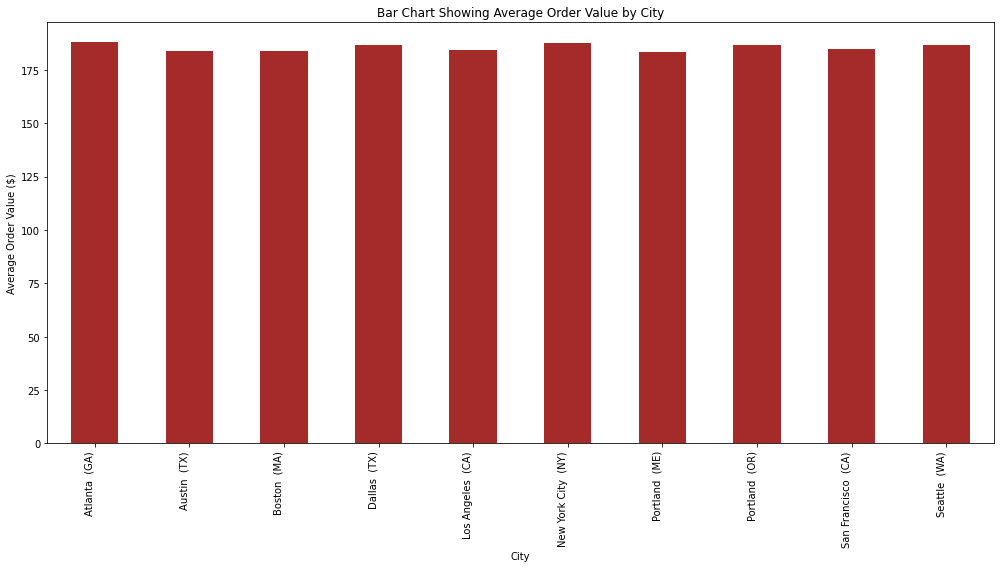

In [26]:
# Calculate average order value by city
avg_order_value_city = df.groupby('City').mean()['Sales']

# Plot the average order value by city
plt.figure(figsize=(14, 8))
avg_order_value_city.plot(kind='bar', color='brown')
plt.title('Bar Chart Showing Average Order Value by City')
plt.xlabel('City')
plt.ylabel('Average Order Value ($)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


## Product Sales Trends Over Time

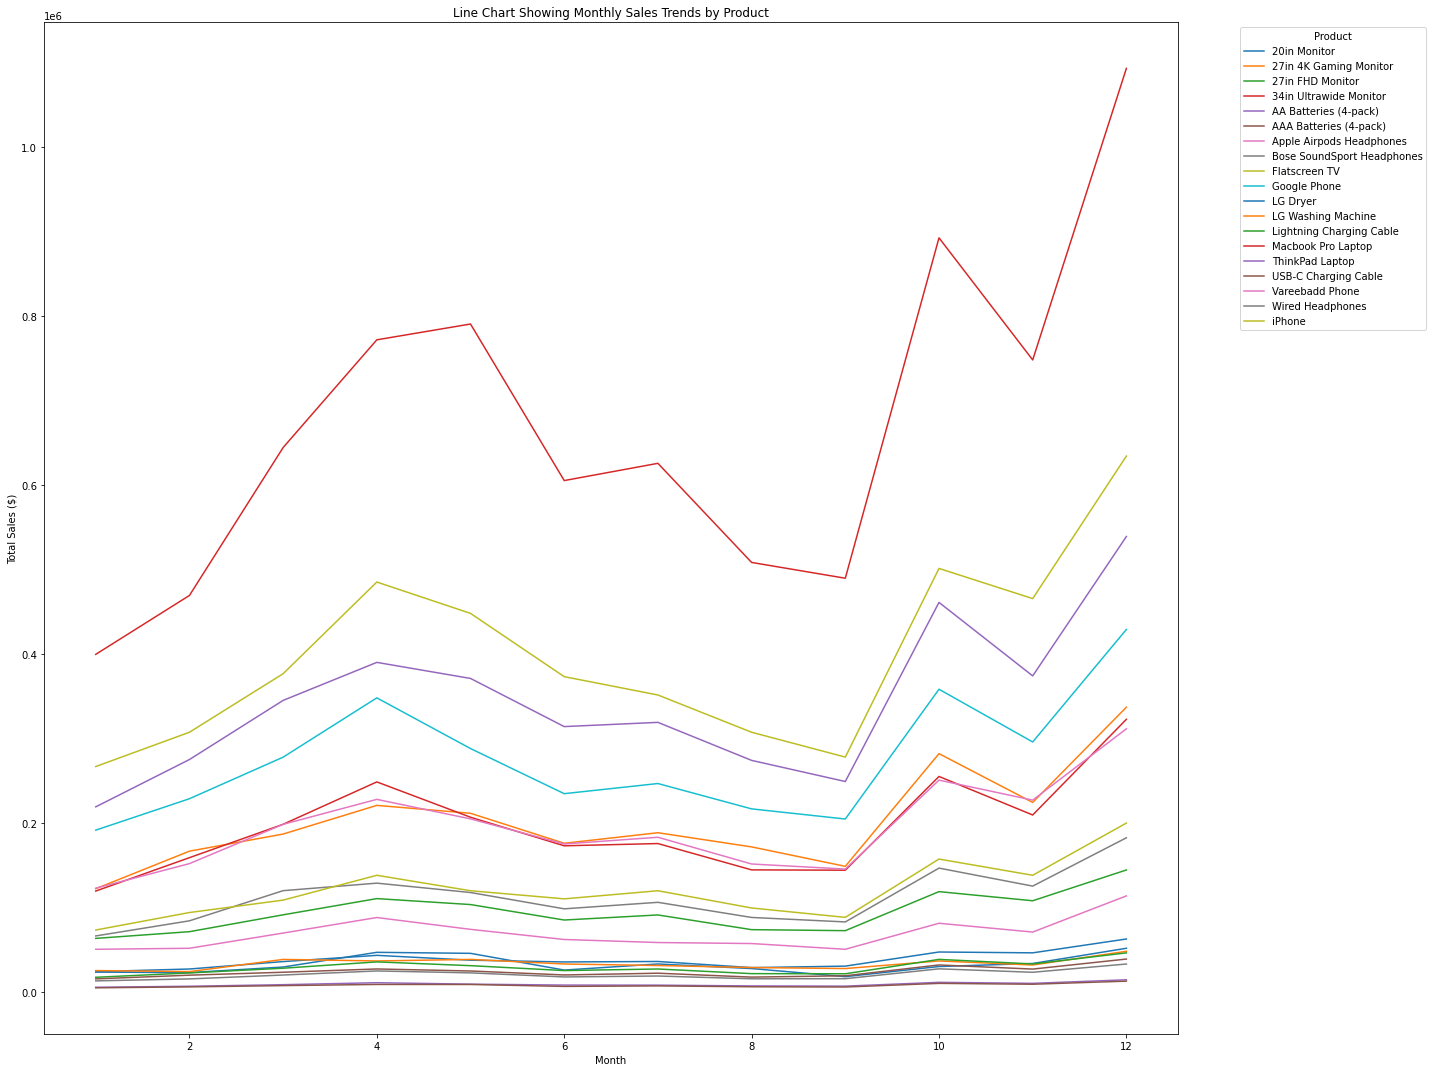

In [27]:
# Group by month and product, then calculate total sales
monthly_product_sales = df.groupby(['Month', 'Product']).sum()['Sales'].unstack()

# Plot the product sales trends over time
monthly_product_sales.plot(kind='line', figsize=(20, 15))
plt.title('Line Chart Showing Monthly Sales Trends by Product')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Sales Performance by Day of the Week

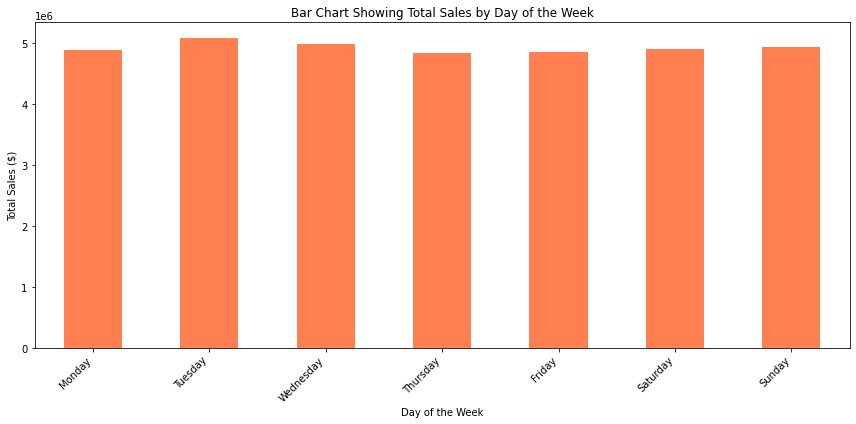

In [28]:
# Extract the day of the week
df['Day of Week'] = df['Order Date'].dt.day_name()

# Group by day of the week and calculate total sales
sales_by_day = df.groupby('Day of Week').sum()['Sales']

# Order the days of the week
sales_by_day = sales_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Plot the sales by day of the week
plt.figure(figsize=(12, 6))
sales_by_day.plot(kind='bar', color='coral')
plt.title('Bar Chart Showing Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Customer Segmentation

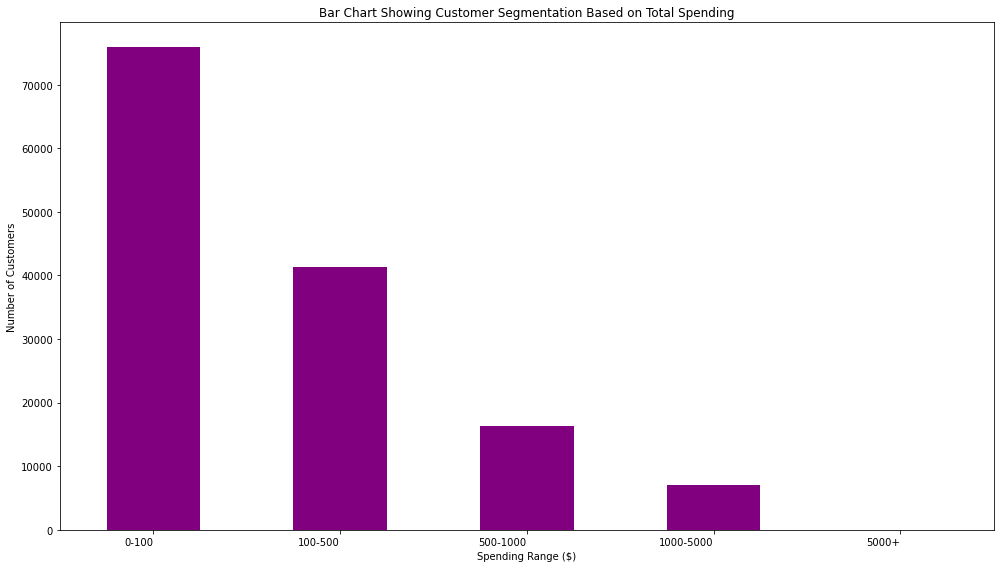

In [29]:
# Assuming you have customer data, you can segment based on metrics like total sales per customer
# Example: Customer segmentation based on total spending
customer_sales = df.groupby('Purchase Address').sum()['Sales']

# Define segments based on spending
bins = [0, 100, 500, 1000, 5000, 10000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']
customer_segments = pd.cut(customer_sales, bins=bins, labels=labels)

# Count the number of customers in each segment
segment_counts = customer_segments.value_counts()

# Plot the customer segments
plt.figure(figsize=(14, 8))
segment_counts.plot(kind='bar', color='purple')
plt.title('Bar Chart Showing Customer Segmentation Based on Total Spending')
plt.xlabel('Spending Range ($)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


## DASHBOARD

In [30]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Sales Dashboard"),
    dcc.Tabs([
        dcc.Tab(label='Best Month for Sales', children=[
            dcc.Graph(id='best-month-sales')
        ]),
        dcc.Tab(label='City with Most Sales', children=[
            dcc.Graph(id='city-most-sales')
        ]),
        dcc.Tab(label='Products Sold Together', children=[
            dcc.Graph(id='products-sold-together')
        ]),
        dcc.Tab(label='Most Sold Products', children=[
            dcc.Graph(id='most-sold-products')
        ]),
        dcc.Tab(label='Product Sales Analysis', children=[
            dcc.Graph(id='product-sales-analysis')
        ]),
        dcc.Tab(label='Sales by Hour', children=[
            dcc.Graph(id='sales-by-hour')
        ]),
        dcc.Tab(label='Average Order Value by City', children=[
            dcc.Graph(id='avg-order-value-city')
        ]),
        dcc.Tab(label='Product Sales Trends', children=[
            dcc.Graph(id='product-sales-trends')
        ]),
        dcc.Tab(label='Sales by Day of the Week', children=[
            dcc.Graph(id='sales-by-day')
        ]),
        dcc.Tab(label='Correlation Matrix', children=[
            dcc.Graph(id='correlation-matrix')
        ]),
        dcc.Tab(label='Customer Segmentation', children=[
            dcc.Graph(id='customer-segmentation')
        ]),
    ])
])
@app.callback(
    Output('best-month-sales', 'figure'),
    Input('best-month-sales', 'id')
)
def update_best_month_sales(_):
    # Calculate total sales by month
    monthly_sales = df.groupby('Month').sum()['Sales']
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    monthly_sales.index = months[:len(monthly_sales)]
    
    # Create bar chart
    fig = px.bar(monthly_sales, x=monthly_sales.index, y='Sales', labels={'x':'Month', 'y':'Total Sales ($)'})
    fig.update_layout(title_text='Total Sales by Month')
    
    return fig

@app.callback(
    Output('city-most-sales', 'figure'),
    Input('city-most-sales', 'id')
)
def update_city_most_sales(_):
    # Group by city and calculate total sales
    city_sales = df.groupby('City').sum()['Sales']
    
    # Create bar chart
    fig = px.bar(city_sales, x=city_sales.index, y='Sales', labels={'x':'City', 'y':'Total Sales ($)'})
    fig.update_layout(title_text='Total Sales by City')
    
    return fig

@app.callback(
    Output('products-sold-together', 'figure'),
    Input('products-sold-together', 'id')
)
def update_products_sold_together(_):
    # Aggregate products by Order ID
    order_product = df.groupby('Order ID')['Product'].apply(list).reset_index()
    
    # Generate all possible product pairs for each order
    product_pairs = []
    for order in order_product['Product']:
        product_pairs.extend(list(combinations(order, 2)))
    
    # Count the frequency of each pair
    pair_counts = Counter(product_pairs)
    most_common_pairs = pair_counts.most_common(10)
    pairs, counts = zip(*most_common_pairs)
    pair_names = [' & '.join(pair) for pair in pairs]
    
    # Create bar chart
    fig = px.bar(x=pair_names, y=counts, labels={'x':'Product Pairs', 'y':'Number of Times Sold Together'})
    fig.update_layout(title_text='Top 10 Most Common Product Pairs Sold Together')
    
    return fig

@app.callback(
    Output('most-sold-products', 'figure'),
    Input('most-sold-products', 'id')
)
def update_most_sold_products(_):
    # Group by product and calculate total quantity ordered
    product_quantity = df.groupby('Product').sum()['Quantity Ordered']
    
    # Create bar chart
    fig = px.bar(product_quantity, x=product_quantity.index, y='Quantity Ordered', labels={'x':'Product', 'y':'Total Quantity Ordered'})
    fig.update_layout(title_text='Total Quantity Ordered by Product')
    
    return fig

@app.callback(
    Output('product-sales-analysis', 'figure'),
    Input('product-sales-analysis', 'id')
)
def update_product_sales_analysis(_):
    # Group by product and calculate the sum of quantity ordered and total sales
    product_group = df.groupby('Product').sum()[['Quantity Ordered', 'Sales']]
    
    # Create combined bar and line chart
    fig = go.Figure()
    fig.add_trace(go.Bar(x=product_group.index, y=product_group['Quantity Ordered'], name='Quantity Ordered', marker_color='blue'))
    fig.add_trace(go.Scatter(x=product_group.index, y=product_group['Sales'], name='Sales', mode='lines+markers', line=dict(color='red')))
    fig.update_layout(title_text='Total Quantity Ordered and Sales by Product', xaxis_title='Product', yaxis_title='Total Quantity Ordered', yaxis2=dict(title='Total Sales ($)', overlaying='y', side='right'))
    
    return fig

@app.callback(
    Output('sales-by-hour', 'figure'),
    Input('sales-by-hour', 'id')
)
def update_sales_by_hour(_):
    # Group by hour and calculate total sales
    hourly_sales = df.groupby('hour').sum()['Sales']
    
    # Create bar chart
    fig = px.bar(hourly_sales, x=hourly_sales.index, y='Sales', labels={'x':'Hour of the Day', 'y':'Total Sales ($)'})
    fig.update_layout(title_text='Total Sales by Hour of the Day')
    
    return fig

@app.callback(
    Output('avg-order-value-city', 'figure'),
    Input('avg-order-value-city', 'id')
)
def update_avg_order_value_city(_):
    # Calculate average order value by city
    avg_order_value_city = df.groupby('City').mean()['Sales']
    
    # Create bar chart
    fig = px.bar(avg_order_value_city, x=avg_order_value_city.index, y='Sales', labels={'x':'City', 'y':'Average Order Value ($)'})
    fig.update_layout(title_text='Average Order Value by City')
    
    return fig

@app.callback(
    Output('product-sales-trends', 'figure'),
    Input('product-sales-trends', 'id')
)
def update_product_sales_trends(_):
    # Group by month and product, then calculate total sales
    monthly_product_sales = df.groupby(['Month', 'Product']).sum()['Sales'].unstack()
    
    # Create line chart
    fig = px.line(monthly_product_sales, labels={'variable':'Product', 'value':'Total Sales ($)', 'index':'Month'})
    fig.update_layout(title_text='Monthly Sales Trends by Product')
    
    return fig

@app.callback(
    Output('sales-by-day', 'figure'),
    Input('sales-by-day', 'id')
)
def update_sales_by_day(_):
    # Extract the day of the week
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Day of Week'] = df['Order Date'].dt.day_name()
    
    # Group by day of the week and calculate total sales
    sales_by_day = df.groupby('Day of Week').sum()['Sales']
    
    # Order the days of the week
    sales_by_day = sales_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    # Create bar chart
    fig = px.bar(sales_by_day, x=sales_by_day.index, y='Sales', labels={'x':'Day of the Week', 'y':'Total Sales ($)'})
    fig.update_layout(title_text='Total Sales by Day of the Week')
    
    return fig

@app.callback(
    Output('correlation-matrix', 'figure'),
    Input('correlation-matrix', 'id')
)
def update_correlation_matrix(_):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Create heatmap
    fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values, x=correlation_matrix.columns, y=correlation_matrix.columns, colorscale='Viridis'))
    fig.update_layout(title_text='Correlation Matrix', xaxis_title='Variables', yaxis_title='Variables')
    
    return fig

@app.callback(
    Output('customer-segmentation', 'figure'),
    Input('customer-segmentation', 'id')
)
def update_customer_segmentation(_):
    # Segment customers based on total sales
    customer_sales = df.groupby('Purchase Address').sum()['Sales']
    
    # Define segments based on spending
    bins = [0, 100, 500, 1000, 5000, 10000]
    labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']
    customer_segments = pd.cut(customer_sales, bins=bins, labels=labels)
    
    # Count the number of customers in each segment
    segment_counts = customer_segments.value_counts()
    
    # Create bar chart
    fig = px.bar(segment_counts, x=segment_counts.index, y=segment_counts.values, labels={'x':'Spending Range ($)', 'y':'Number of Customers'})
    fig.update_layout(title_text='Customer Segmentation Based on Total Spending')
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-31-2395e48c117f>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-31-2395e48c117f>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Sales Dashboard

<ipython-input-32-7c44e06b5789>:52: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-32-7c44e06b5789>:60: UserWarning:

FixedFormatter should only be used together with FixedLocator



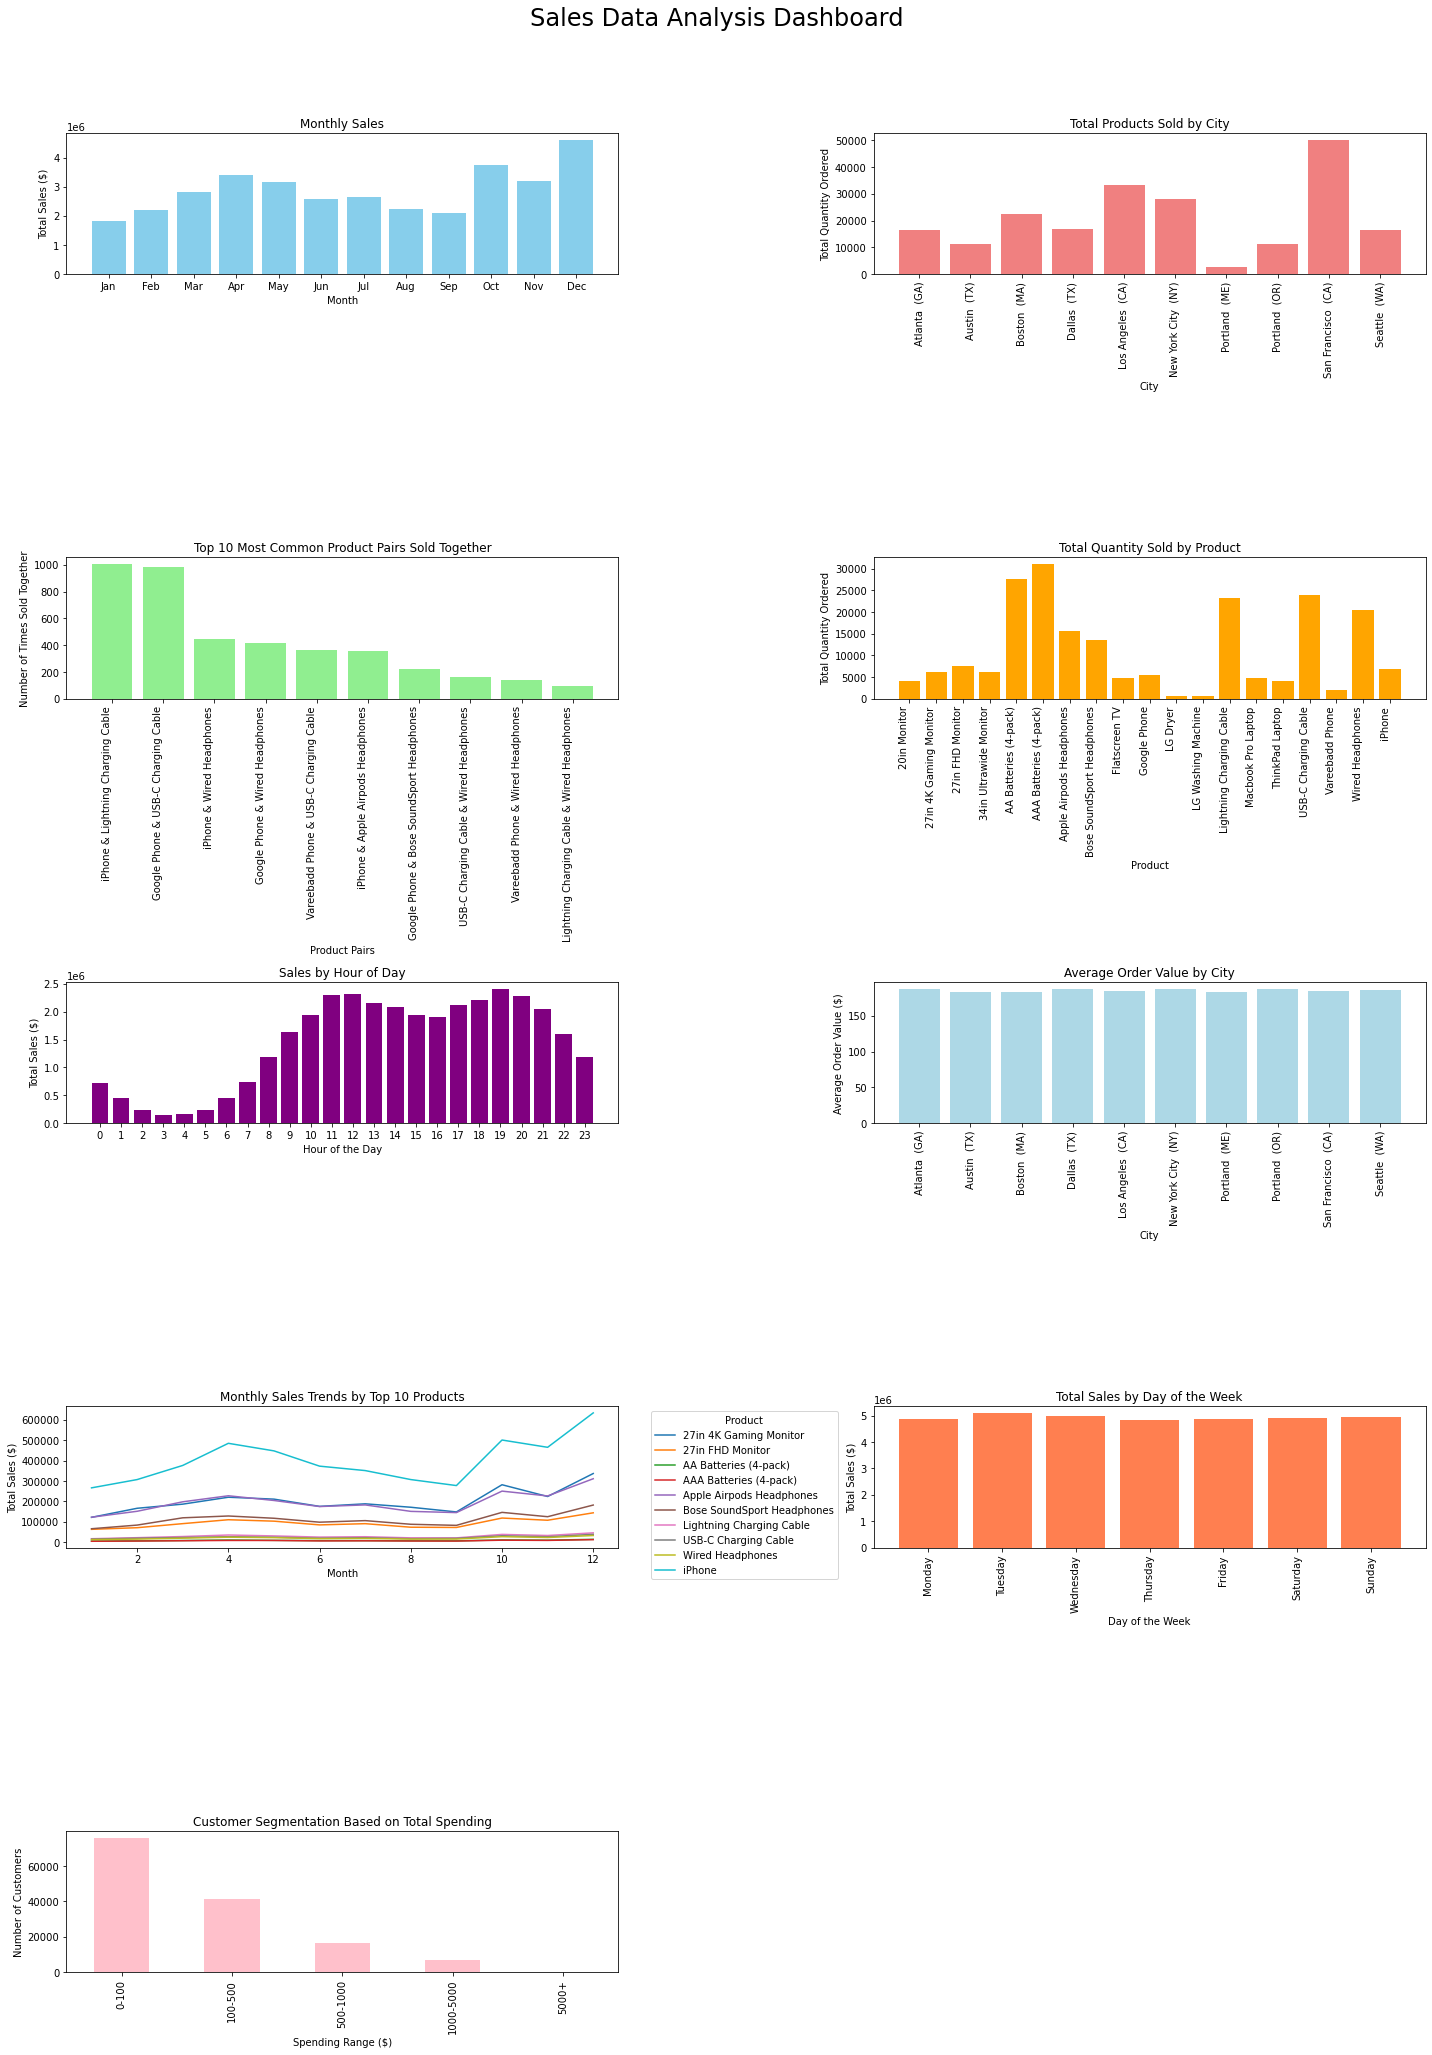

In [32]:
# Grouping for different visualizations
monthly_sales = df.groupby('Month').sum()['Sales']
city_sales = df.groupby('City').sum()['Quantity Ordered']
product_sales = df.groupby('Product').sum()['Quantity Ordered']
product_sales_values = df.groupby('Product').sum()['Sales']
hourly_sales = df.groupby('hour').sum()['Sales']
avg_order_value_city = df.groupby('City').mean()['Sales']
sales_by_day = df.groupby('Day of Week').sum()['Sales']
sales_by_day = sales_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Finding most common product pairs
order_product = df.groupby('Order ID')['Product'].apply(list).reset_index()
product_pairs = [list(combinations(order, 2)) for order in order_product['Product'] if len(order) > 1]
product_pairs = [pair for sublist in product_pairs for pair in sublist]
pair_counts = Counter(product_pairs)
most_common_pairs = pair_counts.most_common(10)
pairs, counts = zip(*most_common_pairs)
pair_names = [' & '.join(pair) for pair in pairs]

# Customer segmentation based on total spending
customer_sales = df.groupby('Purchase Address').sum()['Sales']
bins = [0, 100, 500, 1000, 5000, 10000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']
customer_segments = pd.cut(customer_sales, bins=bins, labels=labels)
segment_counts = customer_segments.value_counts()

# Create the dashboard layout
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle('Sales Data Analysis Dashboard', fontsize=24)

# Monthly Sales Bar Chart
axs[0, 0].bar(monthly_sales.index, monthly_sales.values, color='skyblue')
axs[0, 0].set_title('Monthly Sales')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Total Sales ($)')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Total Products Sold by City Bar Chart
axs[0, 1].bar(city_sales.index, city_sales.values, color='lightcoral')
axs[0, 1].set_title('Total Products Sold by City')
axs[0, 1].set_xlabel('City')
axs[0, 1].set_ylabel('Total Quantity Ordered')
axs[0, 1].tick_params(axis='x', rotation=90)

# Top 10 Most Common Product Pairs Sold Together
axs[1, 0].bar(pair_names, counts, color='lightgreen')
axs[1, 0].set_title('Top 10 Most Common Product Pairs Sold Together')
axs[1, 0].set_xlabel('Product Pairs')
axs[1, 0].set_ylabel('Number of Times Sold Together')
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].set_xticklabels(pair_names, ha='right')

# Total Quantity Sold by Product
axs[1, 1].bar(product_sales.index, product_sales.values, color='orange')
axs[1, 1].set_title('Total Quantity Sold by Product')
axs[1, 1].set_xlabel('Product')
axs[1, 1].set_ylabel('Total Quantity Ordered')
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_xticklabels(product_sales.index, ha='right')

# Sales by Hour of Day
axs[2, 0].bar(hourly_sales.index, hourly_sales.values, color='purple')
axs[2, 0].set_title('Sales by Hour of Day')
axs[2, 0].set_xlabel('Hour of the Day')
axs[2, 0].set_ylabel('Total Sales ($)')
axs[2, 0].set_xticks(range(24))

# Average Order Value by City
axs[2, 1].bar(avg_order_value_city.index, avg_order_value_city.values, color='lightblue')
axs[2, 1].set_title('Average Order Value by City')
axs[2, 1].set_xlabel('City')
axs[2, 1].set_ylabel('Average Order Value ($)')
axs[2, 1].tick_params(axis='x', rotation=90)

# Monthly Sales Trends by Top 10 Products
top_10_products = product_sales.nlargest(10).index
monthly_sales_top_10 = df[df['Product'].isin(top_10_products)].groupby(['Month', 'Product']).sum()['Sales'].unstack()
monthly_sales_top_10.plot(kind='line', ax=axs[3, 0])
axs[3, 0].set_title('Monthly Sales Trends by Top 10 Products')
axs[3, 0].set_xlabel('Month')
axs[3, 0].set_ylabel('Total Sales ($)')
axs[3, 0].legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Total Sales by Day of the Week
axs[3, 1].bar(sales_by_day.index, sales_by_day.values, color='coral')
axs[3, 1].set_title('Total Sales by Day of the Week')
axs[3, 1].set_xlabel('Day of the Week')
axs[3, 1].set_ylabel('Total Sales ($)')
axs[3, 1].tick_params(axis='x', rotation=90)

# Customer Segmentation Based on Total Spending
segment_counts.plot(kind='bar', color='pink', ax=axs[4, 0])
axs[4, 0].set_title('Customer Segmentation Based on Total Spending')
axs[4, 0].set_xlabel('Spending Range ($)')
axs[4, 0].set_ylabel('Number of Customers')
axs[4, 0].tick_params(axis='x', rotation=90)

# Remove the unused subplot
fig.delaxes(axs[4, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Interpretation of the Sales Dashboard 

This dashboard will provide a comprehensive overview of sales performance and can guide strategic decisions to optimize sales and marketing efforts.

### Best Month for Sales
- **Insight**: December is the best month for sales, with the highest sales value of approximately 4.5 million Dollars. This suggests a significant increase in consumer spending during the holiday season.

### City with Most Product Sales
- **Insight**: San Francisco (CA) has the highest product sales, generating approximately 8 million Dollars. This indicates that San Francisco is a key market for your products. Los Angeles (CA) and New York (NY) are also notable cities with high sales.

###  Products Often Sold Together
- **Insight**: The most common product pair sold together is "iPhone & Lightning Charging Cable," followed by "Google Phone & USB-C Charging Cable." This suggests that customers often buy accessories along with their main electronic devices.

###  Most Sold Products
- **Insight**: The most sold product is "AAA Batteries (4-pack)" with over 30,000 units sold. This indicates high demand for batteries. Other popular products include "AA Batteries (4-pack)" and "USB-C Charging Cable."


 **Bar Chart Showing Total Quantity Sold by Product:**
   - This chart displays the total quantity of each product sold.
   - "AAA Batteries (4-pack)" is the most sold product, followed by "AA Batteries (4-pack)" and "USB Charging Cable".

 **Bar Chart Showing Sales by Hour of Day:**
   - This chart represents the total sales occurring at different hours of the day.
   - Sales peak at around 19:00 (7 PM), suggesting that most purchases are made in the evening.

 **Bar Chart Showing Average Order Value by City:**
   - This chart shows the average order value for each city.
   - Customers in San Francisco have the highest average order value, followed by Los Angeles and New York City.

 **Line Chart Showing Monthly Sales Trends by Top 10 Products:**
   - This line chart depicts the sales trends over the months for the top 10 products.
   - The sales of "iPhone" and "Lightning Charging Cable" show a noticeable increase in the later months, indicating their popularity.

 **Bar Chart Showing Total Sales by Day of the Week:**
   - This chart displays the total sales for each day of the week.
   - Sales are relatively consistent throughout the week, with a slight peak on Friday.

 **Bar Chart Showing Customer Segmentation Based on Total Spending:**
   - This chart segments customers based on their total spending.
   - There are a few high spenders and many customers with moderate spending, suggesting a diverse customer base.

### General Insights:
- **Seasonality**: There is a clear peak in sales during December, likely due to holiday shopping.
- **Geographic Focus**: San Francisco, Los Angeles, and New York are significant markets for your products.
- **Product Bundling**: Customers frequently purchase complementary products together, such as phones and charging cables.
- **Popular Products**: Batteries and charging cables are among the top-selling items, indicating consistent demand for these everyday essentials.

### My Recommendations:
1. **Marketing Strategy**: Focus marketing efforts and promotions during the holiday season, especially in December, to capitalize on increased consumer spending.
2. **Geographic Targeting**: Invest in targeted advertising and inventory management in high-sales cities like San Francisco, Los Angeles, and New York.
3. **Product Bundling**: Create bundles and special offers for products that are often sold together to increase average order value.
4. **Stock Management**: Ensure sufficient stock of high-demand products like batteries and charging cables to meet consumer demand.